In [1]:
import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



c:\users\tmp\anaconda3\envs\practicalrl\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
df = pd.read_csv('S&P.csv')

In [3]:
df

,Date,Open,High,Low,Close
0,04/16/2021,"4,174.14","4,191.31","4,170.75","4,185.47"
1,04/15/2021,"4,139.76","4,173.49","4,139.76","4,170.42"
2,04/14/2021,"4,141.58","4,151.69","4,120.87","4,124.66"
3,04/13/2021,"4,130.10","4,148.00","4,124.43","4,141.59"
4,04/12/2021,"4,124.71","4,131.76","4,114.82","4,127.99"
...,...,...,...,...,...
248,04/22/2020,"2,787.89","2,815.10","2,775.95","2,799.31"
249,04/21/2020,"2,784.81","2,785.54","2,727.10","2,736.56"
250,04/20/2020,"2,845.62","2,868.98","2,820.43","2,823.16"
251,04/17/2020,"2,842.43","2,879.22","2,830.88","2,874.56"


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.sort_values('Date', ascending=True, inplace=True)

In [6]:
df.set_index('Date', inplace=True)

In [7]:
df.dtypes

Open     object
High     object
Low      object
Close    object
dtype: object

In [8]:
df['Open'] = df['Open'].apply(lambda x: float(x.replace(',', '')))
df['High'] = df['High'].apply(lambda x: float(x.replace(',', '')))
df['Close'] = df['Close'].apply(lambda x: float(x.replace(',', '')))
df['Low'] = df['Low'].apply(lambda x: float(x.replace(',', '')))

In [9]:
env = gym.make('stocks-v0', df=df, frame_bound=(5, 200), window_size=5)

In [10]:
env.signal_features

array([[ 2.79955e+03,  0.00000e+00],
       [ 2.87456e+03,  7.50100e+01],
       [ 2.82316e+03, -5.14000e+01],
       [ 2.73656e+03, -8.66000e+01],
       [ 2.79931e+03,  6.27500e+01],
       [ 2.79780e+03, -1.51000e+00],
       [ 2.83674e+03,  3.89400e+01],
       [ 2.87848e+03,  4.17400e+01],
       [ 2.86339e+03, -1.50900e+01],
       [ 2.93951e+03,  7.61200e+01],
       [ 2.91243e+03, -2.70800e+01],
       [ 2.83071e+03, -8.17200e+01],
       [ 2.84274e+03,  1.20300e+01],
       [ 2.86844e+03,  2.57000e+01],
       [ 2.84842e+03, -2.00200e+01],
       [ 2.88119e+03,  3.27700e+01],
       [ 2.92980e+03,  4.86100e+01],
       [ 2.93032e+03,  5.20000e-01],
       [ 2.87012e+03, -6.02000e+01],
       [ 2.82000e+03, -5.01200e+01],
       [ 2.85250e+03,  3.25000e+01],
       [ 2.86370e+03,  1.12000e+01],
       [ 2.95391e+03,  9.02100e+01],
       [ 2.92294e+03, -3.09700e+01],
       [ 2.97161e+03,  4.86700e+01],
       [ 2.94851e+03, -2.31000e+01],
       [ 2.95545e+03,  6.94000e+00],
 

In [11]:
env.action_space

Discrete(2)

{'total_reward': 1148.9700000000007, 'total_profit': 0.6766517981962937, 'position': 1}


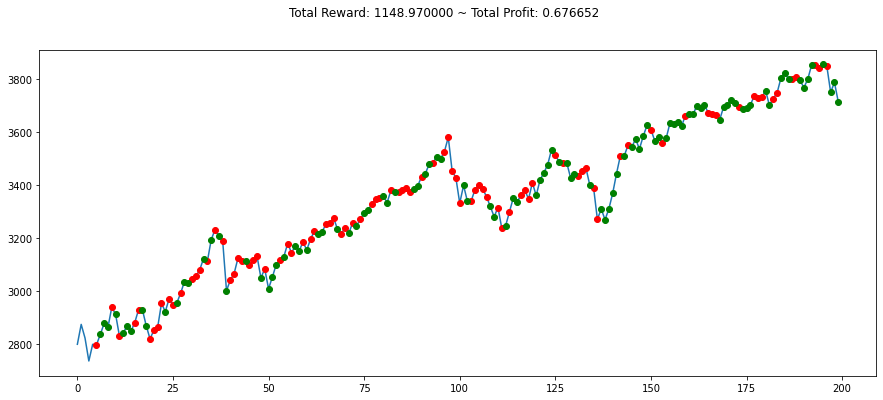

In [12]:
state = env.reset()

while True:
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    
    if done:
        print(info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()


In [14]:
env_training = lambda: gym.make('stocks-v0', df=df, frame_bound=(5, 200), window_size=5)

In [15]:
env = DummyVecEnv([env_training])

In [17]:
#Create our model

model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

----------------------------------
| explained_variance | -1.56e+03 |
| fps                | 17        |
| nupdates           | 1         |
| policy_entropy     | 0.69      |
| total_timesteps    | 5         |
| value_loss         | 3.56e-05  |
----------------------------------
----------------------------------
| explained_variance | -0.000141 |
| fps                | 404       |
| nupdates           | 100       |
| policy_entropy     | 0.687     |
| total_timesteps    | 500       |
| value_loss         | 588       |
----------------------------------
---------------------------------
| explained_variance | 6.95e-05 |
| fps                | 519      |
| nupdates           | 200      |
| policy_entropy     | 0.686    |
| total_timesteps    | 1000     |
| value_loss         | 26.1     |
---------------------------------
----------------------------------
| explained_variance | -0.000471 |
| fps                | 560       |
| nupdates           | 300       |
| policy_entropy     | 0.687

---------------------------------
| explained_variance | -0.00943 |
| fps                | 550      |
| nupdates           | 3000     |
| policy_entropy     | 0.693    |
| total_timesteps    | 15000    |
| value_loss         | 26.8     |
---------------------------------
---------------------------------
| explained_variance | 0.000166 |
| fps                | 553      |
| nupdates           | 3100     |
| policy_entropy     | 0.693    |
| total_timesteps    | 15500    |
| value_loss         | 31.8     |
---------------------------------
---------------------------------
| explained_variance | -0.00235 |
| fps                | 555      |
| nupdates           | 3200     |
| policy_entropy     | 0.691    |
| total_timesteps    | 16000    |
| value_loss         | 315      |
---------------------------------
---------------------------------
| explained_variance | -0.0125  |
| fps                | 557      |
| nupdates           | 3300     |
| policy_entropy     | 0.622    |
| total_timest

---------------------------------
| explained_variance | -0.0225  |
| fps                | 563      |
| nupdates           | 6100     |
| policy_entropy     | 0.651    |
| total_timesteps    | 30500    |
| value_loss         | 1.04e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.0202   |
| fps                | 564      |
| nupdates           | 6200     |
| policy_entropy     | 0.655    |
| total_timesteps    | 31000    |
| value_loss         | 0.812    |
---------------------------------
---------------------------------
| explained_variance | 0.000414 |
| fps                | 563      |
| nupdates           | 6300     |
| policy_entropy     | 0.668    |
| total_timesteps    | 31500    |
| value_loss         | 1.58e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.0141  |
| fps                | 564      |
| nupdates           | 6400     |
| policy_entropy     | 0.458    |
| total_timest

---------------------------------
| explained_variance | -0.0325  |
| fps                | 578      |
| nupdates           | 9100     |
| policy_entropy     | 0.57     |
| total_timesteps    | 45500    |
| value_loss         | 3.46     |
---------------------------------
---------------------------------
| explained_variance | 0.0324   |
| fps                | 578      |
| nupdates           | 9200     |
| policy_entropy     | 0.546    |
| total_timesteps    | 46000    |
| value_loss         | 3.29     |
---------------------------------
----------------------------------
| explained_variance | -0.000414 |
| fps                | 578       |
| nupdates           | 9300      |
| policy_entropy     | 0.66      |
| total_timesteps    | 46500     |
| value_loss         | 4.04e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.0115   |
| fps                | 579      |
| nupdates           | 9400     |
| policy_entropy     | 0.643    |
| tota

----------------------------------
| explained_variance | -0.000972 |
| fps                | 587       |
| nupdates           | 12100     |
| policy_entropy     | 0.45      |
| total_timesteps    | 60500     |
| value_loss         | 16        |
----------------------------------
---------------------------------
| explained_variance | -0.0278  |
| fps                | 587      |
| nupdates           | 12200    |
| policy_entropy     | 0.525    |
| total_timesteps    | 61000    |
| value_loss         | 4.39     |
---------------------------------
---------------------------------
| explained_variance | -0.348   |
| fps                | 588      |
| nupdates           | 12300    |
| policy_entropy     | 0.681    |
| total_timesteps    | 61500    |
| value_loss         | 4.19e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.000397 |
| fps                | 588      |
| nupdates           | 12400    |
| policy_entropy     | 0.679    |
| tota

---------------------------------
| explained_variance | 0.00243  |
| fps                | 593      |
| nupdates           | 15200    |
| policy_entropy     | 0.69     |
| total_timesteps    | 76000    |
| value_loss         | 56.5     |
---------------------------------
---------------------------------
| explained_variance | 0.0493   |
| fps                | 593      |
| nupdates           | 15300    |
| policy_entropy     | 0.677    |
| total_timesteps    | 76500    |
| value_loss         | 1.82e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.00253  |
| fps                | 593      |
| nupdates           | 15400    |
| policy_entropy     | 0.693    |
| total_timesteps    | 77000    |
| value_loss         | 929      |
---------------------------------
---------------------------------
| explained_variance | 0.0173   |
| fps                | 594      |
| nupdates           | 15500    |
| policy_entropy     | 0.409    |
| total_timest

----------------------------------
| explained_variance | -0.000596 |
| fps                | 596       |
| nupdates           | 18300     |
| policy_entropy     | 0.527     |
| total_timesteps    | 91500     |
| value_loss         | 1.43e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.000894 |
| fps                | 596      |
| nupdates           | 18400    |
| policy_entropy     | 0.682    |
| total_timesteps    | 92000    |
| value_loss         | 546      |
---------------------------------
---------------------------------
| explained_variance | 0.0237   |
| fps                | 596      |
| nupdates           | 18500    |
| policy_entropy     | 0.595    |
| total_timesteps    | 92500    |
| value_loss         | 7.53     |
---------------------------------
---------------------------------
| explained_variance | 0.00193  |
| fps                | 596      |
| nupdates           | 18600    |
| policy_entropy     | 0.693    |
| tota

In [18]:
env = gym.make('stocks-v0', df=df, frame_bound=(200, 253), window_size=5)
obs = env.reset()

while True:
    obs = obs[np.newaxis, ...]
    action, states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    
    if done:
        print(info)
        break

{'total_reward': 125.20000000000073, 'total_profit': 0.8998978580235849, 'position': 1}


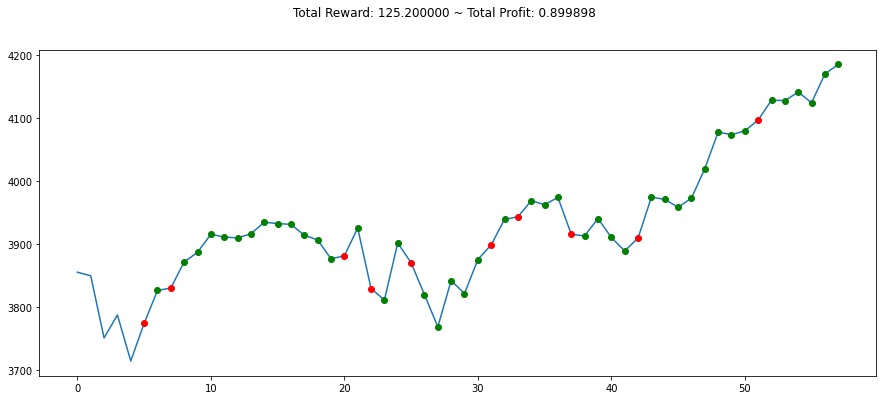

In [19]:
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()

In [22]:
#Add TA to Data
# !pip install yfinance ta

In [27]:
import yfinance as yf
from pandas_datareader import data as pdr

data = pdr.get_data_yahoo('SPY', start='2017-01-01', end='2021-01-01')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,225.830002,223.880005,225.039993,225.240005,91366500.0,208.213501
2017-01-04,226.750000,225.610001,225.619995,226.580002,78744400.0,209.452240
2017-01-05,226.580002,225.479996,226.270004,226.399994,78379000.0,209.285812
2017-01-06,227.750000,225.899994,226.529999,227.210007,71559900.0,210.034561
2017-01-09,227.070007,226.419998,226.910004,226.460007,46939700.0,209.341278
...,...,...,...,...,...,...
2020-12-24,369.029999,367.450012,368.079987,369.000000,26457900.0,367.795380
2020-12-28,372.589996,371.070007,371.739990,372.170013,39000400.0,370.955048
2020-12-29,374.000000,370.829987,373.809998,371.459991,53680500.0,370.247345


In [28]:
from ta import add_all_ta_features

df2 = add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=True)

c:\users\tmp\anaconda3\envs\practicalrl\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
c:\users\tmp\anaconda3\envs\practicalrl\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [30]:
pd.set_option('display.max_columns', None)

In [31]:
df2

,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,225.830002,223.880005,225.039993,225.240005,91366500.0,208.213501,3.607831e+07,9.136650e+07,0.394875,0.000000e+00,50.000000,0.000000,0.000000,-1.873099e+07,1000.000000,224.983337,0.000000,225.240005,225.240005,225.240005,0.000000,0.000000,0.0,0.0,224.983337,226.933334,223.033340,1.733459,0.565812,0.0,0.0,223.880005,225.830002,224.855003,0.865742,0.697437,0.000000,0.000000,0.000000,0.000000,225.240005,225.240005,225.240005,225.240005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.545920,1.000000,0.000000,57.656419,-203.807522,-203.807522,0.000000,224.855003,224.855003,224.855003,224.855003,280.653086,276.988436,4.0,4.0,0.0,-1.000000,-1.000000,0.0,0.0,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.743730,69.743730,-30.256270,0.000000,225.240005,0.000000,0.000000,0.000000,0.000000,-20.380752,0.000000,0.000000
2017-01-04,226.750000,225.610001,225.619995,226.580002,78744400.0,209.452240,9.133778e+07,1.701109e+08,0.536931,1.055172e+08,100.000000,1.918226,1.918226,-1.815271e+07,1005.949193,225.598993,0.000000,225.910004,227.250000,224.570007,1.186310,0.750000,0.0,0.0,225.648336,227.193334,224.103338,1.369386,0.801510,0.0,0.0,223.880005,226.750000,225.315002,1.270415,0.940767,0.000000,0.106894,0.021379,0.085515,225.910004,225.910004,225.446159,225.339264,0.000000,0.000000,0.000000,0.047417,0.003635,0.043782,0.001162,1.932416,66.666667,56.986421,-201.439171,-202.623347,1.184176,225.315002,225.315002,225.315002,225.315002,280.653086,276.988436,8.0,4.0,4.0,-1.000000,-1.000000,0.0,0.0,0.000000,100.000000,0.000000,0.000000,0.000000,100.000000,38.728314,94.076709,81.910219,-5.923291,0.000000,225.783797,0.000000,-1.113429,-0.222686,-0.890743,0.594919,0.593157,0.594919
2017-01-05,226.580002,225.479996,226.270004,226.399994,78379000.0,209.285812,1.440645e+08,9.173190e+07,0.579760,8.842777e+07,50.133959,-0.210519,0.853854,4.061970e+05,1005.150011,225.773843,0.000000,226.073334,227.260967,224.885700,1.050662,0.637526,0.0,0.0,225.816667,227.213335,224.420000,1.236992,0.708828,0.0,0.0,223.880005,226.750000,225.315002,1.269497,0.878046,0.000000,0.175066,0.052116,0.122949,226.073334,226.073334,225.592903,225.417837,0.000000,0.000000,0.000000,0.062311,0.024178,0.038133,0.002894,2.817748,40.399741,56.823091,-200.861821,-202.036171,1.174350,225.315002,225.315002,225.315002,225.315002,280.653086,276.988436,8.0,4.0,4.0,-1.000000,225.830002,0.0,1.0,0.000000,87.361569,0.000000,0.000000,0.000000,99.701923,49.561310,87.804645,83.875028,-12.195355,0.000000,226.029749,0.000000,-2.025313,-0.583211,-1.442102,-0.079446,-0.079477,0.515001
2017-01-06,227.750000,225

In [42]:
from gym_anytrading.envs import StocksEnv

def my_processed_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close', 'Volume', 'momentum_rsi', 'volume_obv', 'trend_macd_diff']].to_numpy()[start:end]
    return prices, signal_features

class MyCustomEnv(StocksEnv):
    _process_data = my_processed_data
    

In [43]:
env2 = MyCustomEnv(df=df2, window_size= 5, frame_bound=(5, 700))

In [44]:
env2.signal_features

array([[ 2.25240005e+02,  9.13665000e+07,  1.00000000e+02,
         9.13665000e+07,  0.00000000e+00],
       [ 2.26580002e+02,  7.87444000e+07,  1.00000000e+02,
         1.70110900e+08,  8.55154358e-02],
       [ 2.26399994e+02,  7.83790000e+07,  8.73615694e+01,
         9.17319000e+07,  1.22949401e-01],
       ...,
       [ 2.93239990e+02,  5.52963000e+07,  4.81878352e+01,
         1.63338480e+09, -6.39538604e-01],
       [ 2.96279999e+02,  9.87204000e+07,  5.30751192e+01,
         1.73210520e+09, -2.46991828e-01],
       [ 2.95950012e+02,  4.03948000e+07,  5.24962634e+01,
         1.69171040e+09, -4.20828432e-03]])

In [45]:
training_env = lambda: env2
env = DummyVecEnv([training_env])


In [46]:
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

---------------------------------
| explained_variance | 0.0103   |
| fps                | 23       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 1.71     |
---------------------------------
---------------------------------
| explained_variance | 0.0199   |
| fps                | 467      |
| nupdates           | 100      |
| policy_entropy     | 0.692    |
| total_timesteps    | 500      |
| value_loss         | 7.53     |
---------------------------------
---------------------------------
| explained_variance | -0.00415 |
| fps                | 549      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 76       |
---------------------------------
---------------------------------
| explained_variance | 0.0105   |
| fps                | 579      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | -0.0648  |
| fps                | 574      |
| nupdates           | 3100     |
| policy_entropy     | 0.691    |
| total_timesteps    | 15500    |
| value_loss         | 0.983    |
---------------------------------
---------------------------------
| explained_variance | 0.000125 |
| fps                | 574      |
| nupdates           | 3200     |
| policy_entropy     | 0.647    |
| total_timesteps    | 16000    |
| value_loss         | 2.66     |
---------------------------------
---------------------------------
| explained_variance | 0.2      |
| fps                | 574      |
| nupdates           | 3300     |
| policy_entropy     | 0.682    |
| total_timesteps    | 16500    |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.0215   |
| fps                | 574      |
| nupdates           | 3400     |
| policy_entropy     | 0.689    |
| total_timest

---------------------------------
| explained_variance | 0.0302   |
| fps                | 573      |
| nupdates           | 6200     |
| policy_entropy     | 0.691    |
| total_timesteps    | 31000    |
| value_loss         | 0.546    |
---------------------------------
---------------------------------
| explained_variance | -0.15    |
| fps                | 573      |
| nupdates           | 6300     |
| policy_entropy     | 0.691    |
| total_timesteps    | 31500    |
| value_loss         | 0.0347   |
---------------------------------
---------------------------------
| explained_variance | -16.3    |
| fps                | 573      |
| nupdates           | 6400     |
| policy_entropy     | 0.682    |
| total_timesteps    | 32000    |
| value_loss         | 0.106    |
---------------------------------
---------------------------------
| explained_variance | 0.0384   |
| fps                | 573      |
| nupdates           | 6500     |
| policy_entropy     | 0.672    |
| total_timest

---------------------------------
| explained_variance | -0.207   |
| fps                | 568      |
| nupdates           | 9300     |
| policy_entropy     | 0.674    |
| total_timesteps    | 46500    |
| value_loss         | 21.7     |
---------------------------------
---------------------------------
| explained_variance | 0.052    |
| fps                | 568      |
| nupdates           | 9400     |
| policy_entropy     | 0.682    |
| total_timesteps    | 47000    |
| value_loss         | 23.5     |
---------------------------------
---------------------------------
| explained_variance | -0.27    |
| fps                | 568      |
| nupdates           | 9500     |
| policy_entropy     | 0.69     |
| total_timesteps    | 47500    |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | -0.904   |
| fps                | 568      |
| nupdates           | 9600     |
| policy_entropy     | 0.689    |
| total_timest

---------------------------------
| explained_variance | -0.267   |
| fps                | 542      |
| nupdates           | 12400    |
| policy_entropy     | 0.679    |
| total_timesteps    | 62000    |
| value_loss         | 0.107    |
---------------------------------
---------------------------------
| explained_variance | -0.0656  |
| fps                | 542      |
| nupdates           | 12500    |
| policy_entropy     | 0.681    |
| total_timesteps    | 62500    |
| value_loss         | 0.81     |
---------------------------------
---------------------------------
| explained_variance | 0.291    |
| fps                | 542      |
| nupdates           | 12600    |
| policy_entropy     | 0.627    |
| total_timesteps    | 63000    |
| value_loss         | 0.0198   |
---------------------------------
---------------------------------
| explained_variance | 0.0107   |
| fps                | 541      |
| nupdates           | 12700    |
| policy_entropy     | 0.692    |
| total_timest

---------------------------------
| explained_variance | -0.0118  |
| fps                | 535      |
| nupdates           | 15500    |
| policy_entropy     | 0.677    |
| total_timesteps    | 77500    |
| value_loss         | 6.88     |
---------------------------------
---------------------------------
| explained_variance | 0.018    |
| fps                | 535      |
| nupdates           | 15600    |
| policy_entropy     | 0.669    |
| total_timesteps    | 78000    |
| value_loss         | 49.2     |
---------------------------------
---------------------------------
| explained_variance | 0.0461   |
| fps                | 535      |
| nupdates           | 15700    |
| policy_entropy     | 0.672    |
| total_timesteps    | 78500    |
| value_loss         | 5.14     |
---------------------------------
---------------------------------
| explained_variance | 0.0171   |
| fps                | 535      |
| nupdates           | 15800    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | 0.0361   |
| fps                | 541      |
| nupdates           | 18600    |
| policy_entropy     | 0.616    |
| total_timesteps    | 93000    |
| value_loss         | 13.3     |
---------------------------------
---------------------------------
| explained_variance | 0.11     |
| fps                | 541      |
| nupdates           | 18700    |
| policy_entropy     | 0.6      |
| total_timesteps    | 93500    |
| value_loss         | 2.9      |
---------------------------------
---------------------------------
| explained_variance | 0.0495   |
| fps                | 542      |
| nupdates           | 18800    |
| policy_entropy     | 0.583    |
| total_timesteps    | 94000    |
| value_loss         | 36.4     |
---------------------------------
---------------------------------
| explained_variance | -1.38    |
| fps                | 542      |
| nupdates           | 18900    |
| policy_entropy     | 0.618    |
| total_timest

In [47]:
env = MyCustomEnv(df=df2, window_size=5, frame_bound=(700, 1000))
obs = env.reset()

while True:
    obs = obs[np.newaxis, ...]
    action, states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    
    if done:
        print(info)
        break

{'total_reward': 33.269927978515625, 'total_profit': 0.3435169315174451, 'position': 0}


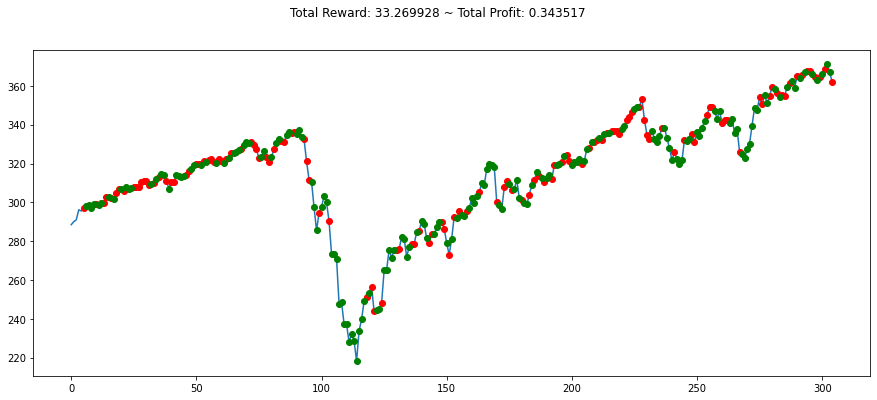

In [48]:
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()